Sidar Taskiran, Weijie Zhang, Kateryna Tishchenko

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import TruncatedSVD
from numpy.random import RandomState

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

##Aufgabe 1:
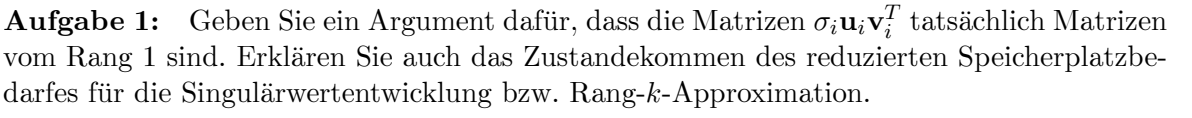

Eine Eigenschaft von Rang r besagt: r(AB) <= min(r(A),r(B))

σ(i) ist Konstante und beeinflusst den Rang somit nicht.

r(u(i)) = 1, da u(i) ein Spaltenvektor ist. r(v(i)^T) = 1, da v(i) ein Spaltenvektor ist.

-> Daher kann der Rang von u(i)*v(i)^T nie größer als 1 sein.

u(i) und v(i) sind Eigenvektoren und sind niemals 0. 

-> Daher kann der Rang von u(i)*v(i)^T auch nicht 0 sein.



###Beispiel: Matrix A und die dazugehörige gekürzte Singulärwertzerlegung:

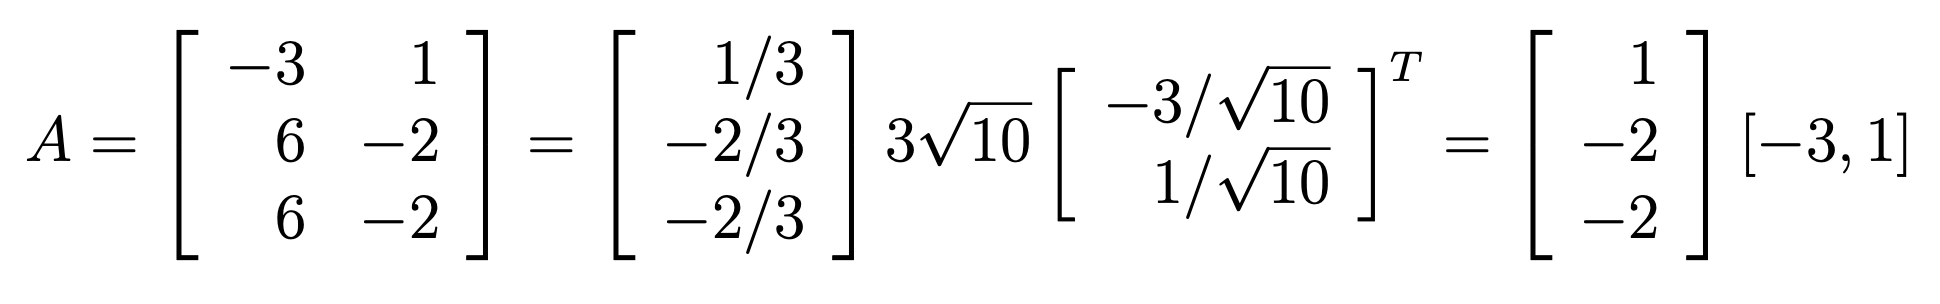

###Matrix A und die dazugehörige vollständige Singulärwertzerlegung:

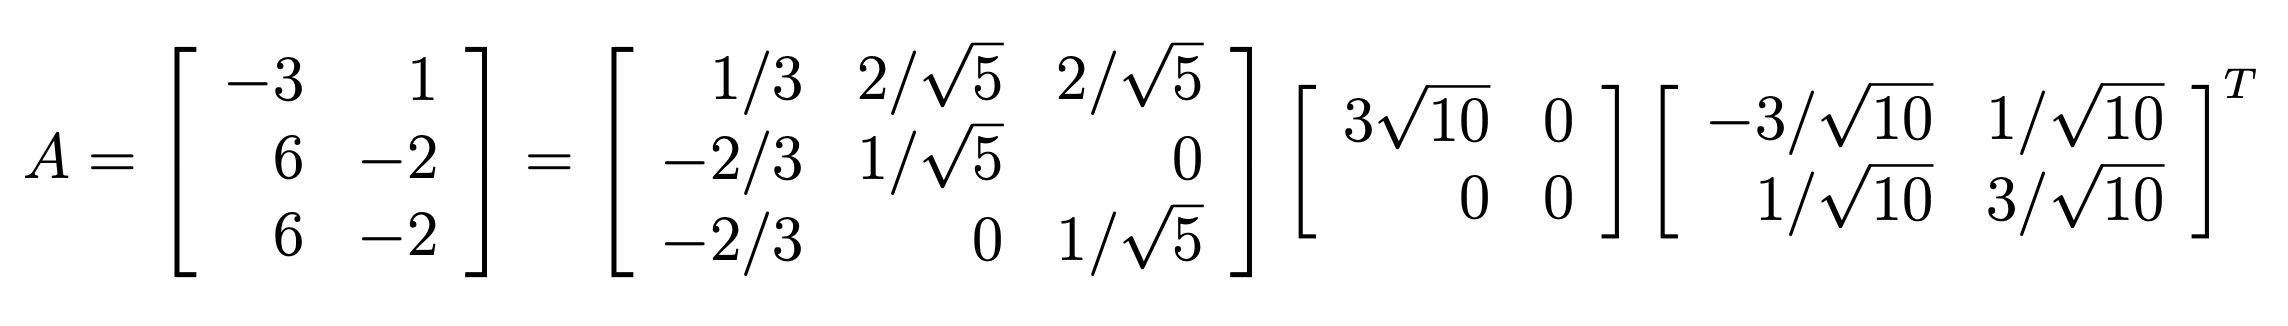

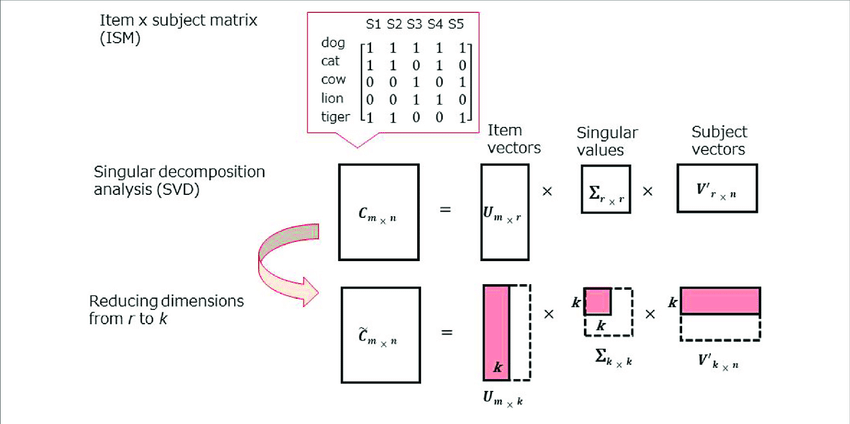

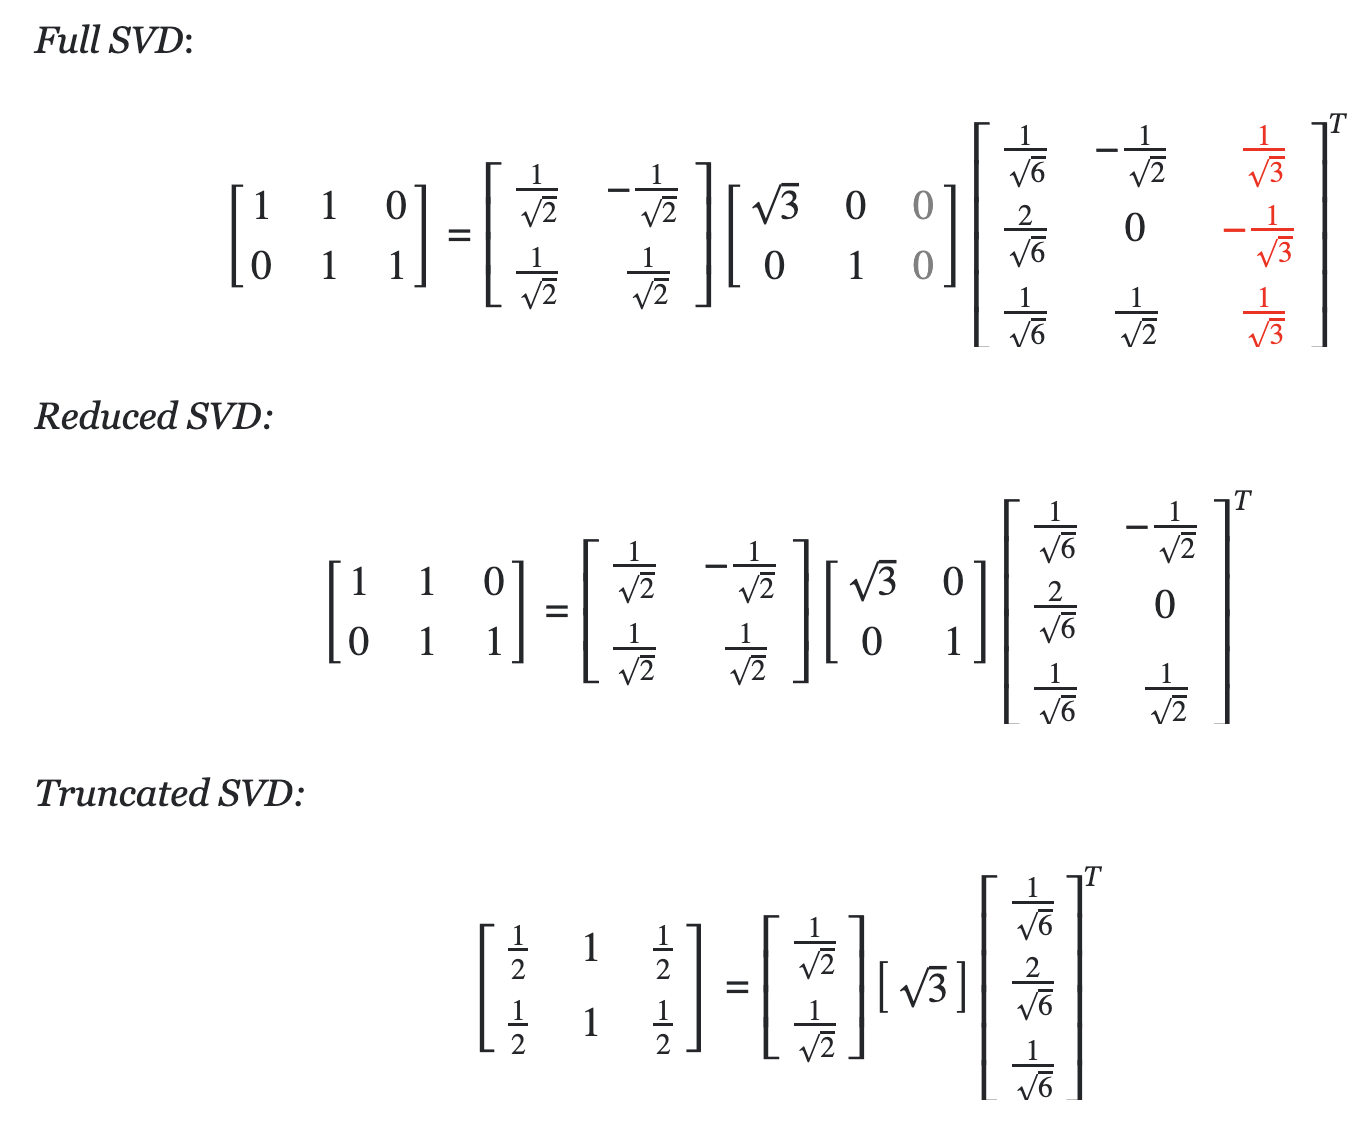

##Aufgabe 2:
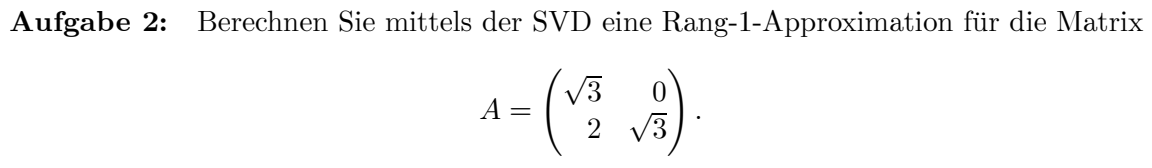

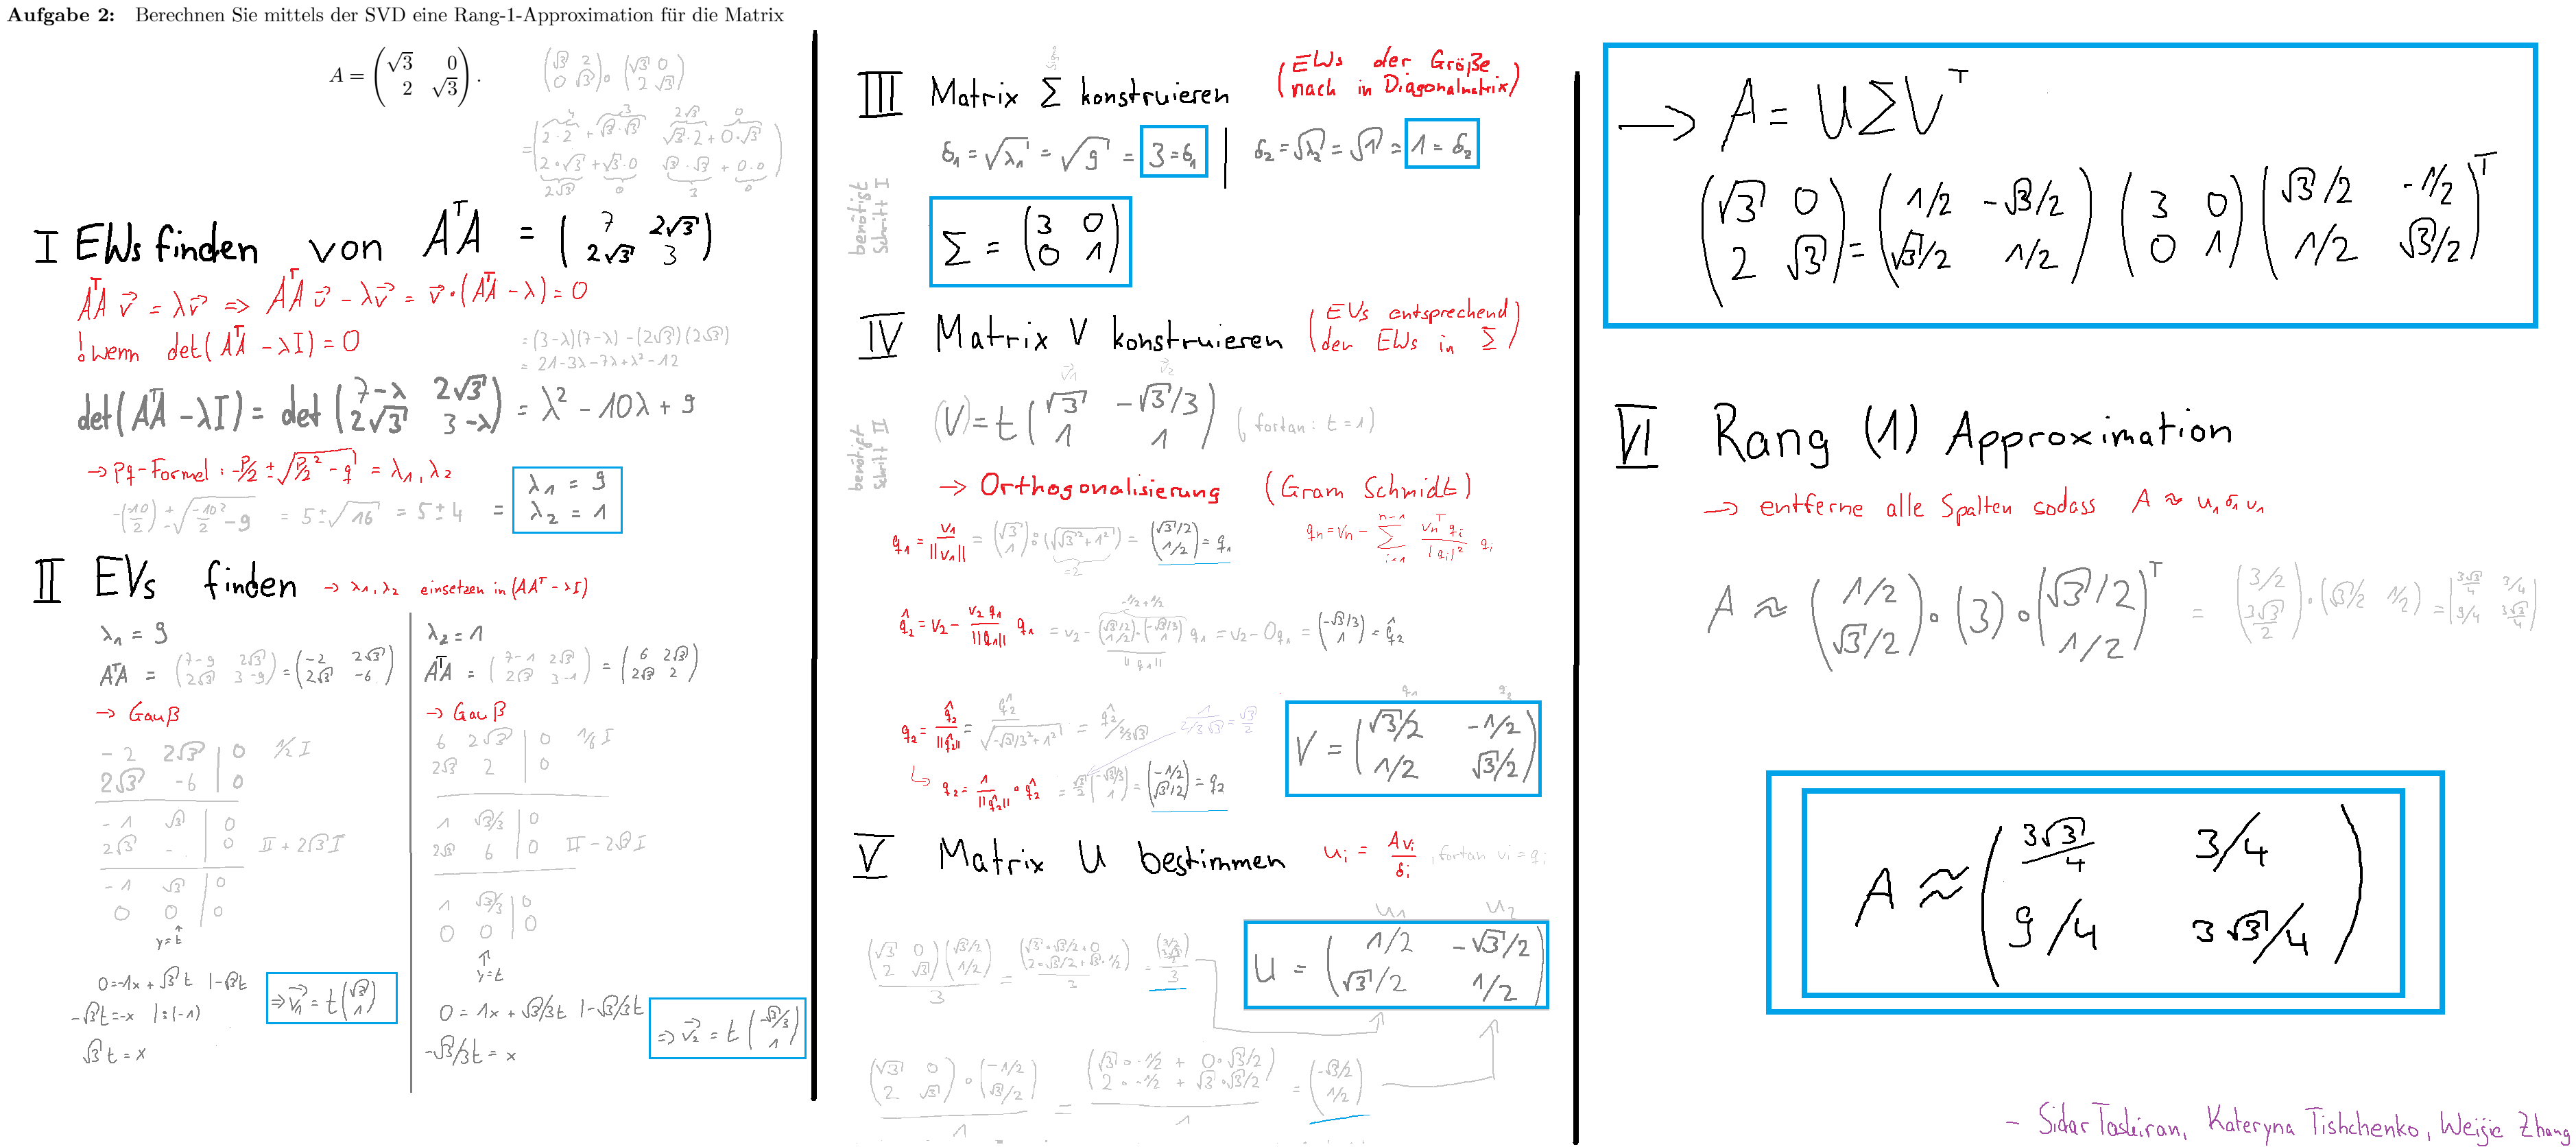

##Aufgabe 3:
Implementieren Sie in Python eine Funktion, die als Argument eine Matrix entgegennimmt und die Matrizen U, Σ, V T der gekürzten SVD zurückgibt. Diese Funktion soll sich der Funktionen numpy.linalg.eigh(), numpy.linalg.qr(), numpy.linalg.inv() neben weiteren elementaren numpy Funktionen bedienen.

In [40]:
#Aufgabe 3:
import numpy as np
from numpy import linalg as LA


def my_truncated_svd(A, rank):
    # reduced svd or truncated svd?
    # if LA.matrix_rank(A) <= rank: # only truncated svd is possible
    if LA.matrix_rank(A) < rank:  # both reduced and truncated svd are possible
        raise ValueError('Gewuenschter Rang soll kleiner als Rang von A (%s) sein!' % LA.matrix_rank(A))
    # calculate A^T * A
    ATA = np.dot(A.T, A)
    # calculate Eigenvalues and Eigenvectors of A^T * A using method eigh()
    ATA_w, ATA_v = LA.eigh(ATA)
    # apply QR decomposition to Eigenvectors to get the orthonormalized Eigenvectors
    ATA_v_orthonormal, _ = LA.qr(ATA_v)
    # sort orthonormalized Eigenvektors to corespond to ascendingly sorted Eigenvalues
    # - concatenate Eigenvalues and Eigenvectors vertically to a single matrix
    ATA_wv = np.vstack((ATA_w, ATA_v_orthonormal))
    # - use ascendingly sorted Eigenvalues as indices to sort the Eigenvectors ascendingly, then reverse the whole matrix by column
    #   to a descending order
    ATA_wv_sorted = ATA_wv[:, np.argsort(ATA_wv[0])[::-1]]
    # seperate the matrix to Eigenvalues and Eigenvectors
    ATA_w_sorted = ATA_wv_sorted[0]
    # truncate sorted Eigenvalues according to specified rank and extract their square roots to get the needed Sigma-values
    print(ATA_w_sorted)
    count_positiv = len(ATA_w_sorted)
    for i in range(len(ATA_w_sorted)):
        if ATA_w_sorted[i] < 0:
            ATA_w_sorted[i] = 0
            count_positiv -= 1
    S_matrix = np.diag(ATA_w_sorted)
    print(S_matrix)
    # truncate sorted Eigenvectors according to specified rank
    # ATA_v_sorted_truncated = ATA_wv_sorted[1:, :rank]
    V = ATA_wv_sorted[1:]
    # apply QR decomposition to truncated Eigenvectors to get the orthonormalized right singular matrix V
    # V, _ = LA.qr(ATA_v_sorted_truncated)
    # calculate the matrix U_tmp with the equation A*V*Σ^(-1) = U
    S_inv = LA.inv(S_matrix)
    VS_inv = np.dot(V, S_inv)
    U_tmp = np.dot(A, VS_inv)
    # apply QR decomposition to U_tmp to get the orthonormalized left singular matrix U
    U, _ = LA.qr(U_tmp)
    # return the calculated results
    return U[:,:rank], S[:rank], V[:,:rank].T


##Aufgabe 4: 
Vergleichen Sie Ihre Implementierung aus Aufgabe 3 mit numpy.linalg.svd()
zum Beispiel anhand der folgenden Matrizen

In [8]:
import numpy as np
import numpy.linalg as LA

A0 = np.array([[pow(3, 0.5), 0], [2, pow(3, 0.5)]])
A1 = np.array([[1, 1, 1], [2, 2, 2]])
A2 = np.array([[1, 0, 1], [-2, 1, 0]])
A3 = np.array([[3, 2, 2], [2, 3, 2], [2, 2, 3]])
A4 = np.array([[9, -1, -1, 1], [-1, 9, 1, -1], [-1, 1, 9, -1], [1, -1, -1, 9]])

In [41]:
print("My truncated SVD für Matrix A0: \n")
U, S, VT = my_truncated_svd(A0, 2)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

print("----------------------------------------")

print("SVD für Matrix A0: \n")
U, S, VT = np.linalg.svd(A0)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

My truncated SVD für Matrix A0: 

[9. 1.]
[[9. 0.]
 [0. 1.]]
U= 
 [[-0.5       -0.8660254]
 [-0.8660254  0.5      ]]
S= 
 [3.87298335e+00 1.46571787e-16]
VT= 
 [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
----------------------------------------
SVD für Matrix A0: 

U= 
 [[-0.5       -0.8660254]
 [-0.8660254  0.5      ]]
S= 
 [3. 1.]
VT= 
 [[-0.8660254 -0.5      ]
 [-0.5        0.8660254]]


In [42]:
print("My truncated SVD für Matrix A1: \n")
U, S, VT = my_truncated_svd(A1, 1)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

print("----------------------------------------")

print("SVD für Matrix A1: \n")
U, S, VT = np.linalg.svd(A1)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

My truncated SVD für Matrix A1: 

[ 1.50000000e+01  3.24849485e-17 -4.44089210e-16]
[[1.50000000e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.24849485e-17 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


LinAlgError: Singular matrix

In [21]:
print("My truncated SVD für Matrix A2: \n")
U, S, VT = my_truncated_svd(A2, 2)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

print("----------------------------------------")

print("SVD für Matrix A2: \n")
U, S, VT = np.linalg.svd(A2)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

My truncated SVD für Matrix A2: 

[ 6.00000000e+00  1.00000000e+00 -6.73072709e-16]
U= 
 [[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]
S= 
 [7. 1.]
VT= 
 [[ 9.12870929e-01 -3.65148372e-01  1.82574186e-01]
 [ 7.81734838e-17 -4.47213595e-01 -8.94427191e-01]]
----------------------------------------
SVD für Matrix A2: 

U= 
 [[ 0.4472136   0.89442719]
 [-0.89442719  0.4472136 ]]
S= 
 [2.44948974 1.        ]
VT= 
 [[ 9.12870929e-01 -3.65148372e-01  1.82574186e-01]
 [-3.90238130e-16  4.47213595e-01  8.94427191e-01]
 [-4.08248290e-01 -8.16496581e-01  4.08248290e-01]]


In [22]:
print("My truncated SVD für Matrix A3: \n")
U, S, VT = my_truncated_svd(A3, 3)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

print("----------------------------------------")

print("SVD für Matrix A3: \n")
U, S, VT = np.linalg.svd(A3)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

My truncated SVD für Matrix A3: 

[49.  1.  1.]


ValueError: shapes (3,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [23]:
print("My truncated SVD für Matrix A4: ")
U, S, VT = my_truncated_svd(A4, 4)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

print("----------------------------------------")

print("\nSVD für Matrix A4: ")
U, S, VT = np.linalg.svd(A4)
print("U= \n", U)
print("S= \n", S)
print("VT= \n", VT)

My truncated SVD für Matrix A4: 
[144.  64.  64.  64.]


ValueError: shapes (4,4) and (2,2) not aligned: 4 (dim 1) != 2 (dim 0)

##Aufgabe 5: 
Wenden Sie die Singulärwertentwicklung auf einzelne Schwarz-Weiß-Bilder an, visualisieren Sie ausgewählte Rang-k-Approximationen und vergleichen Sie die entsprechenden Speicherplatzbedarfe. Sie *können* zum Beispiel folgenden Gesichts-Datensatz verwenden:

(1025, 1025)


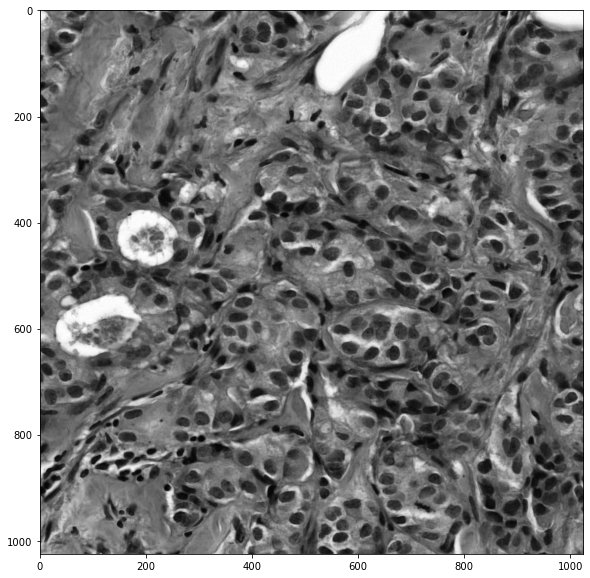

In [9]:
image = Image.open('mamma_tissue.png')
image_gray = image.convert('LA')
image_matrix = np.array(list(image_gray.getdata(band=0)), float)
image_matrix.shape = (image_gray.size[1], image_gray.size[0])
print(image_matrix.shape)
image_matrix = np.matrix(image_matrix)
plt.figure(figsize=(10, 10))
plt.imshow(image_matrix, cmap='gray');

In [10]:
U, S, VT = np.linalg.svd(image_matrix)

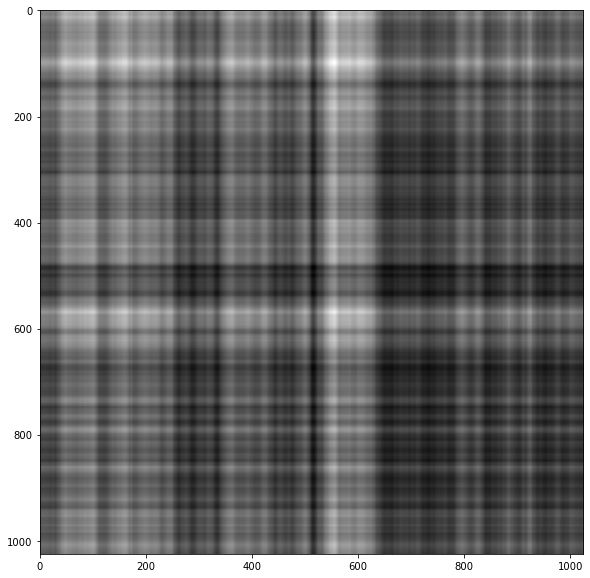

In [11]:
svd_image = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(VT[:1, :])
plt.figure(figsize=(10, 10))
plt.imshow(svd_image, cmap='gray');

Speicherbedarf ist  0.04 MB
Größe im Vergleich zum Original  1.0 %


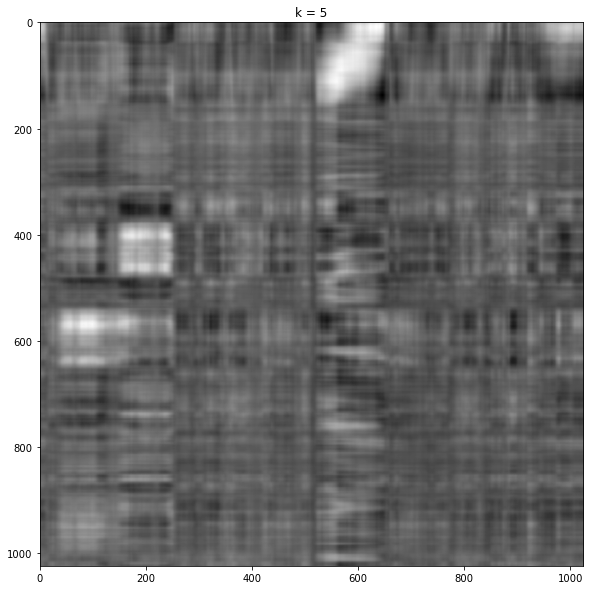

Speicherbedarf ist  0.25 MB
Größe im Vergleich zum Original  6.0 %


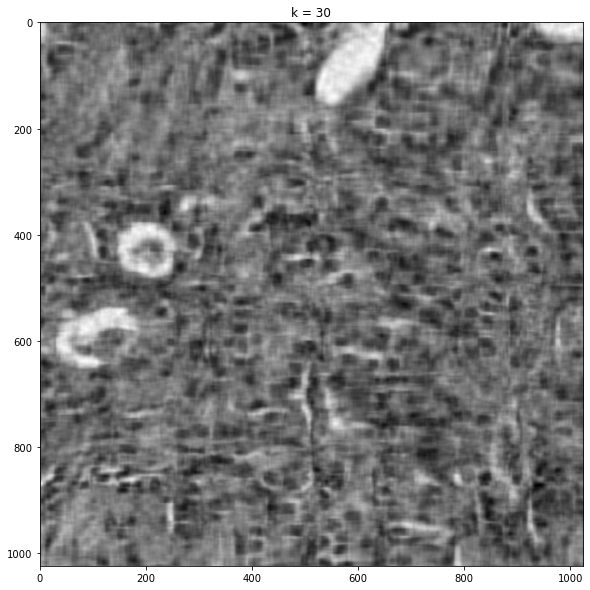

Speicherbedarf ist  0.45 MB
Größe im Vergleich zum Original  11.0 %


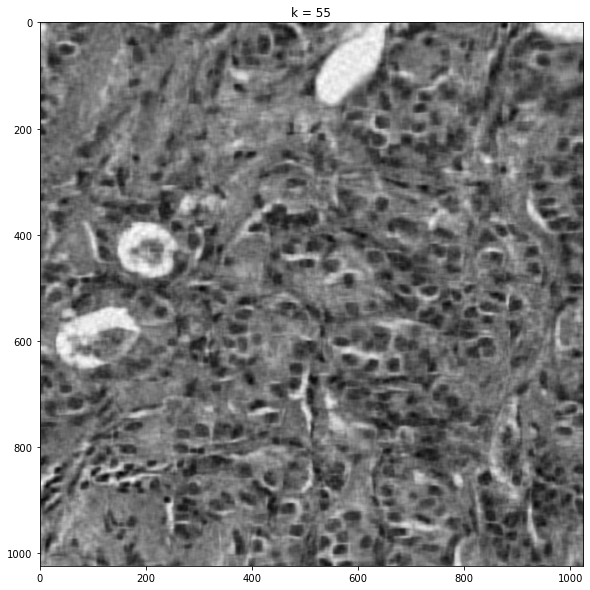

Speicherbedarf ist  0.66 MB
Größe im Vergleich zum Original  16.0 %


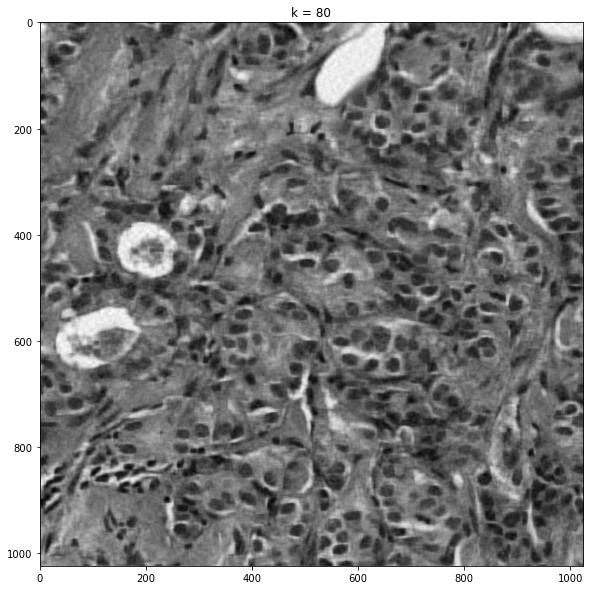

Speicherbedarf ist  0.86 MB
Größe im Vergleich zum Original  20.0 %


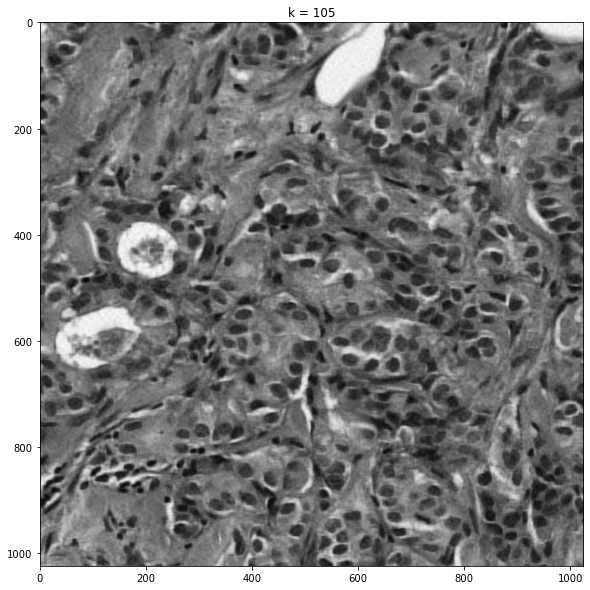

Speicherbedarf ist  1.07 MB
Größe im Vergleich zum Original  25.0 %


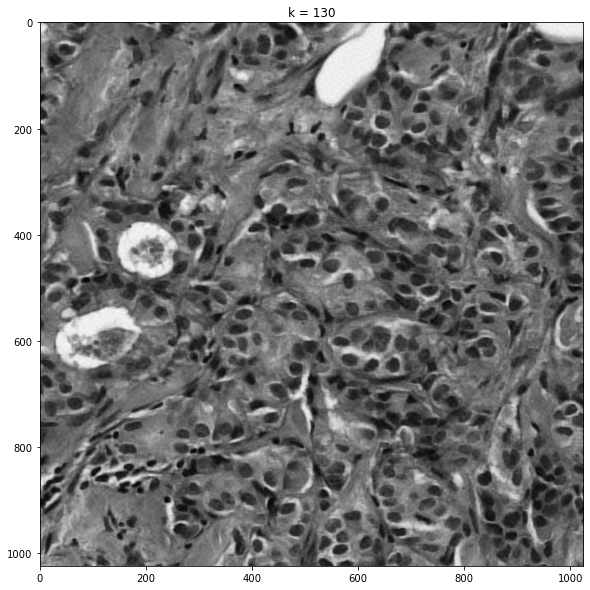

Speicherbedarf ist  1.27 MB
Größe im Vergleich zum Original  30.0 %


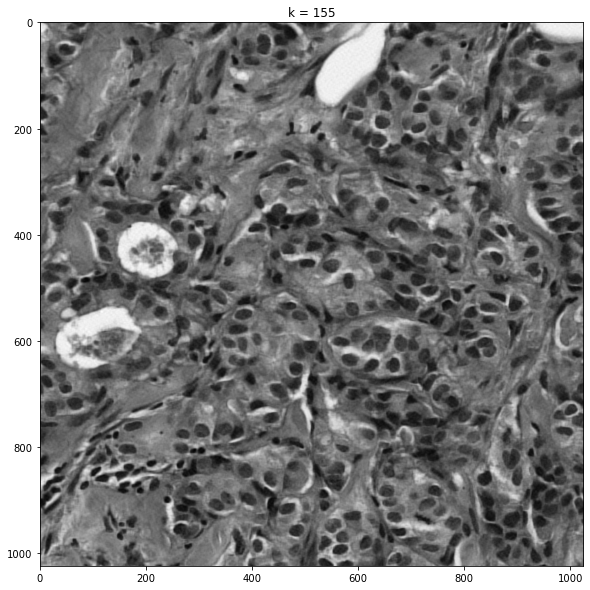

In [12]:
for i in range(5, 156, 25):
    svd_image = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(VT[:i, :])
    plt.figure(figsize=(10, 10))
    plt.imshow(svd_image, cmap='gray')
    im = Image.fromarray(svd_image)
    width, height = im.size
    rounded_size = round((width + height + 1) * i * 4 * 0.000001, 2)
    print("Speicherbedarf ist ", rounded_size, "MB")
    speicherbedarf_vergliechen_mit_original = round((width + height + 1) * i * 4 / (width * height * 4), 2) * 100
    print("Größe im Vergleich zum Original ", speicherbedarf_vergliechen_mit_original, "%")
    plt.title("k = %s" % i)
    plt.show()